In [28]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image 
from skimage.color import rgb2gray
import scipy
from scipy import ndimage, misc
from scipy.ndimage import interpolation as inter
from scipy.signal import convolve2d
from math import sqrt as math_sqrt
from math import pi as math_pi
import matplotlib.image as mat
from emnist import list_datasets
from emnist import extract_training_samples
from emnist import extract_test_samples
from sklearn import svm
from joblib import load
import docx
from textblob import TextBlob
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import load_model
from skimage.transform import resize, pyramid_reduce
from spellchecker import SpellChecker as sc
import random

In [29]:
'''
Stages :

Preprocessing:
1) Acquisition of image , resizing , Grayscale transformation.
2) Binarization 
3) Noise Removal 
4) Skew Correction 
5) Skeletonization 


Segmentation:
6) Line level Segmentation
7) Word level Segmentation
8) Deslanting 
9) Character level Segmentation


Feature Extraction:
10)model Training and prediction.


Postprocessing:
11)spell correction and document conversion.

'''

'\nStages :\n\nPreprocessing:\n1) Acquisition of image , resizing , Grayscale transformation.\n2) Binarization \n3) Noise Removal \n4) Skew Correction \n5) Skeletonization \n\n\nSegmentation:\n6) Line level Segmentation\n7) Word level Segmentation\n8) Deslanting \n9) Character level Segmentation\n\n\nFeature Extraction:\n10)model Training and prediction.\n\n\nPostprocessing:\n11)spell correction and document conversion.\n\n'

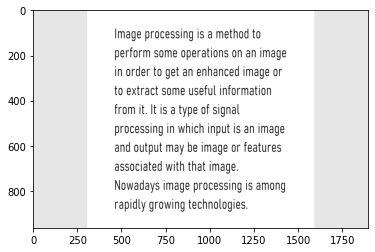

In [30]:
'''
Acquisition of image , , Grayscale transformation.

'''
img = cv2.imread('1test.png',)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
(t,u) = img.shape
plt.imshow(img,cmap="gray",aspect='auto')

# copies of array for further use
copy_1= np.empty_like(img)
copy_1[:,:]=img[:,:]

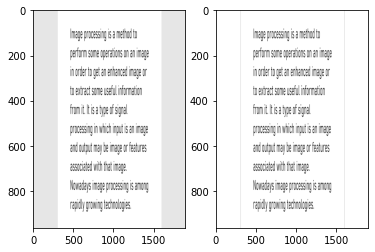

In [31]:
'''
Binarization : This generally means changing the pixel value to its lowest possible value or highest possible value by selecting
               a threshold value from the image . the pixel which greater value than threshold will be shifted to highest and if 
               less than to the lowest.

 -> The crucial aspect here is the way we select the threshold value .
 -> There are few methods for it and we must select the best suitable  one fro this project.

 i)  Selecting a random threshold with giving zero preference to the image data.
      
      This method may work but if the ligthing on the image is not uniform we might miss some info.
      eg: when we click the picture or the paper , we may  also capture any shadow which will disturb the lighting uniformity
          of the picture and the place effected by the shadow will be completely darkend and th info will be lost.
 
 ii) Otsu’s Binarization
 
      This method gives a threshold for the whole image considering the various characteristics of the whole image
      (like lighting conditions, contrast, sharpness etc) , yet we may loose few info at the darker regions .

iii) Adaptive Thresholding
       
      This method gives a threshold for a small part of the image depending on the characteristics of its locality and 
      neighbours i.e there is no single fixed threshold for the whole image but every small part of the image has a different 
      threshold depending upon the locality and also gives smooth transition.

      ->here theshold is the  weighted sum of neighborhood values where weights are a Gaussian window.This eliminates our 
        problem of lighting uniformity

 Adaptive thresholding is the best way of binarizing in the context of the project.

 '''

Binary_img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
fig,a =  plt.subplots(1,2)
a[0].imshow(img,cmap="gray",aspect='auto')
a[1].imshow(Binary_img,cmap="gray",aspect='auto')


In [32]:
#code for adding slant in image if required
'''
for i in range(t) :
    for j in range(u) :
        if Binary_img[i,j] == 255 :
            Binary_img[i,j] = 0
        else :
            Binary_img[i,j] = 255

image3 = Binary_img[164:223, 1278:1436] 
row,col = image3.shape
plt.imshow(image3,cmap="gray",aspect='auto')
l = np.array([[1,0.3,0],[0,1,0]])
dst1 = cv2.warpAffine(image3,l,(col,row)) 
Binary_img[164:223,1278:1436] =dst1
for i in range(t) :
    for j in range(u) :
        if Binary_img[i,j] == 255 :
            Binary_img[i,j] = 0
        else :
            Binary_img[i,j] = 255
            
plt.imshow(Binary_img,cmap="gray",aspect='auto')
'''


'\nfor i in range(t) :\n    for j in range(u) :\n        if Binary_img[i,j] == 255 :\n            Binary_img[i,j] = 0\n        else :\n            Binary_img[i,j] = 255\n\nimage3 = Binary_img[164:223, 1278:1436] \nrow,col = image3.shape\nplt.imshow(image3,cmap="gray",aspect=\'auto\')\nl = np.array([[1,0.3,0],[0,1,0]])\ndst1 = cv2.warpAffine(image3,l,(col,row)) \nBinary_img[164:223,1278:1436] =dst1\nfor i in range(t) :\n    for j in range(u) :\n        if Binary_img[i,j] == 255 :\n            Binary_img[i,j] = 0\n        else :\n            Binary_img[i,j] = 255\n            \nplt.imshow(Binary_img,cmap="gray",aspect=\'auto\')\n'

In [33]:
#code for adding skewangle in image if required
'''
for i in range(t) :
    for j in range(u) :
        if Binary_img[i,j] == 255 :
            Binary_img[i,j] = 0
        else :
            Binary_img[i,j] = 255

Binary_img = inter.rotate(Binary_img,5, reshape=False, order=0)

for i in range(t) :
    for j in range(u) :
        if Binary_img[i,j] == 255 :
            Binary_img[i,j] = 0
        else :
            Binary_img[i,j] = 255

plt.imshow(Binary_img,cmap="gray",aspect='auto')
'''

'\nfor i in range(t) :\n    for j in range(u) :\n        if Binary_img[i,j] == 255 :\n            Binary_img[i,j] = 0\n        else :\n            Binary_img[i,j] = 255\n\nBinary_img = inter.rotate(Binary_img,5, reshape=False, order=0)\n\nfor i in range(t) :\n    for j in range(u) :\n        if Binary_img[i,j] == 255 :\n            Binary_img[i,j] = 0\n        else :\n            Binary_img[i,j] = 255\n\nplt.imshow(Binary_img,cmap="gray",aspect=\'auto\')\n'

In [34]:
#code for adding noise in image if required
'''
def add_noise(img):
  
    # Getting the dimensions of the image
    row , col = img.shape
      
    # Randomly pick some pixels in the
    # image for coloring them white
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(10000, 50000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to white
        img[y_coord][x_coord] = 255
          
    # Randomly pick some pixels in
    # the image for coloring them black
    # Pick a random number between 300 and 10000
    number_of_pixels = random.randint(10000, 50000)
    for i in range(number_of_pixels):
        
        # Pick a random y coordinate
        y_coord=random.randint(0, row - 1)
          
        # Pick a random x coordinate
        x_coord=random.randint(0, col - 1)
          
        # Color that pixel to black
        img[y_coord][x_coord] = 0
          
    return img
Binary_img  = add_noise(Binary_img)
plt.imshow(Binary_img,cmap="gray",aspect='auto')
cv2.imwrite('sample5next.jpg',Binary_img)
'''

'\ndef add_noise(img):\n  \n    # Getting the dimensions of the image\n    row , col = img.shape\n      \n    # Randomly pick some pixels in the\n    # image for coloring them white\n    # Pick a random number between 300 and 10000\n    number_of_pixels = random.randint(10000, 50000)\n    for i in range(number_of_pixels):\n        \n        # Pick a random y coordinate\n        y_coord=random.randint(0, row - 1)\n          \n        # Pick a random x coordinate\n        x_coord=random.randint(0, col - 1)\n          \n        # Color that pixel to white\n        img[y_coord][x_coord] = 255\n          \n    # Randomly pick some pixels in\n    # the image for coloring them black\n    # Pick a random number between 300 and 10000\n    number_of_pixels = random.randint(10000, 50000)\n    for i in range(number_of_pixels):\n        \n        # Pick a random y coordinate\n        y_coord=random.randint(0, row - 1)\n          \n        # Pick a random x coordinate\n        x_coord=random.randint

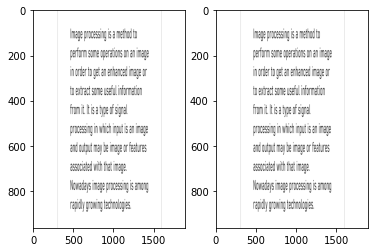

In [35]:
'''
 Noise Removal: The main objective of the Noise removal stage is to smoothen the image by removing small dots which have high
                intensity than the rest of the image.

    -> One way of performing Noise removal by using OpenCV medianBlur function.

'''
def estimate_noise(I):

  H, W = I.shape

  M = [[1, -2, 1],
       [-2, 4, -2],
       [1, -2, 1]]

  sigma = np.sum(np.sum(np.absolute(convolve2d(I, M))))
  sigma = sigma * math_sqrt(0.5 * math_pi) / (6 * (W-2) * (H-2))

  return sigma

w = estimate_noise(Binary_img)


if w>10:
    img1 = cv2.medianBlur(Binary_img,5) 
    img2 = cv2.medianBlur(img1,3) 
    denoise_img = cv2.medianBlur(img2, 1)
else :
    denoise_img = Binary_img

fig,a =  plt.subplots(1,2)
a[0].imshow(Binary_img,cmap="gray",aspect='auto')
a[1].imshow(denoise_img,cmap="gray",aspect='auto')


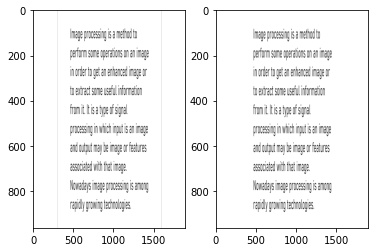

In [36]:
'''
 Skeletonization: for handwritten text,  different writers have a different style of writing and hence different stroke width.
                  So to make the width of strokes uniform, we have to perform this process.

        -> Dilation : A pixel in the original image (either 1 or 0) will be considered 1 if any one of  the pixels under the 
                      kernel is 1, otherwise it is eroded (made to zero).
                    
        -> Thus all the pixels near boundary will be discarded depending upon the size of kernel, even the iterations are also 
           important
'''

kernel = np.ones((2,2),np.uint8)
img_erode = cv2.dilate(denoise_img,kernel,iterations = 1)
img_dilation = cv2.erode(img_erode,kernel,iterations = 1)
fig,a =  plt.subplots(1,2)
a[0].imshow(denoise_img,cmap="gray",aspect='auto')
a[1].imshow(img_dilation,cmap="gray",aspect='auto')



# copies of array for further use
cpy = np.empty_like(img_dilation)
cpy[:,:]=img_dilation[:,:]
cpy2= np.empty_like(img_dilation)
cpy2[:,:]=img_dilation[:,:]
cpy11= np.empty_like(img_dilation)
cpy11[:,:]=img_dilation[:,:]

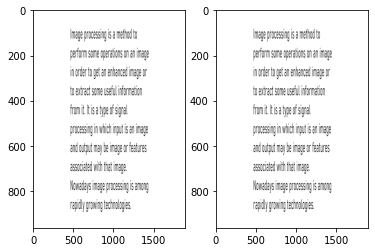

In [37]:

'''
Skew Correction: While scanning a document, it might be slightly skewed (image aligned at a certain angle with horizontal) 
                 sometimes.While extracting the information from the scanned image, detecting & correcting the skew is crucial.
                 Several techniques skew correction.

   -> Projection profile method
   -> Hough transformation method
   -> Topline method
   -> Scanline method

 the best and easy out of all is Projection profile method.

 In this method, 
    i) Taking the sum of black pixels in row wise to get a histogram of pixels along the height of the image.

   ii) Now the image is rotated at various angles  and the variance  will be calculated  The angle at which the maximum 
       Variance is found, that corresponding angle will be the Skew angle for the image.
    
  iii) After finding the Skew angle, we can correct the skewness by rotating the image through an angle equal to the skew angle
       in the opposite direction of skew.

'''
fig,a =  plt.subplots(1,2)
a[0].imshow(img_dilation,cmap="gray",aspect='auto')


# for this method we nee to apply inversion 
for i in range(t) :
    for j in range(u) :
        if img_dilation[i,j] == 255 :
            img_dilation[i,j] = 0
        else :
            img_dilation[i,j] = 255




# function to find the histogram with rotating the image
def find_variance(arr, angle):
    data = inter.rotate(arr, angle, reshape=False, order=0)
    row_histogram = data.shape[1] - np.sum(data, axis=1)//255
    variance = np.sum((row_histogram[1:] - row_histogram[:-1]) ** 2)
    return row_histogram, variance

#find the angle
delta = 1
limit = 40
angles = np.arange(-limit, limit+delta, delta) #This process fails if we take the angles more than 60 we might end up getting a upside down img.
variances = []
angles
for angle in angles:
    row_histogram, variance = find_variance(img_dilation, angle)
    variances.append(variance)
best_variance = max(variances)
best_angle = angles[variances.index(best_variance)]



# correct skew
skewed_img = inter.rotate(img_dilation,best_angle, reshape=False, order=0)


# for this method we nee to apply inversion 
for i in range(t) :
    for j in range(u) :
        if skewed_img[i,j] == 0 :
            skewed_img[i,j] = 255
        else :
            skewed_img[i,j] = 0

a[1].imshow(skewed_img,cmap="gray",aspect='auto')



#copies of array for further use
cpy14= np.empty_like(skewed_img)
cpy14[:,:]=skewed_img[:,:]
cpy15= np.empty_like(skewed_img)
cpy15[:,:]=skewed_img[:,:]
cpy20= np.empty_like(skewed_img)
cpy20[:,:]=skewed_img[:,:]
cpy21= np.empty_like(skewed_img)
cpy21[:,:]=skewed_img[:,:]


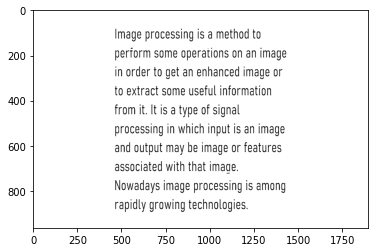

In [38]:
# code for removing the noise between sentences for next algo to work perfectly
horizontal_hist = skewed_img.shape[1] - np.sum(skewed_img,axis=1,keepdims=True)//255
l = sum(horizontal_hist)//len(horizontal_hist)
for i in range(len(horizontal_hist)):
    if horizontal_hist[i]<l//7:
        skewed_img[i,:]=255

plt.imshow(skewed_img,cmap="gray",aspect='auto')

horizontal_hist = []


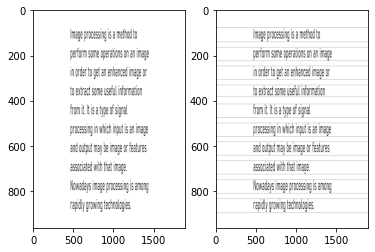

In [39]:
'''
 Line level Segmentation : The idea is, If we Horizontally project the binary image,Rows that represent the text in a line have
                           high No.of  pixels whblackich correspond to higher peaks in the histogram. Rows that represent the 
                           gaps in-between the lines have high No.of background pixels which correspond to lower peaks in the
                           histogram.by using this we can segment at the low peak.
'''

#function for finding gap between lines
def find_space(arr,i):
    k = 0 
    while arr[i+1+k][0]<3: #l//3
        k=k+1
        if i+1+k == t-1:
            k = 0
            break
    return k


#a histogram to know how many balck pixels are present in a particular row
horizontal_hist = skewed_img.shape[1] - np.sum(skewed_img,axis=1,keepdims=True)//255
l = sum(horizontal_hist)//len(horizontal_hist)
row_no =[]
   
w = find_space(horizontal_hist,0)
row_no.append(95*w//100)

for i in range(t-1) :
  
  if horizontal_hist[i][0]>2:#l
    if horizontal_hist[i+1][0] <3:#l
        x = find_space(horizontal_hist,i)
        havg = 10
        if x > havg :
            row_no.append(i+x*10//100)
            row_no.append(i+x*95//100)    

k = 0
while horizontal_hist[t-1-k][0] < l :
    k = k+1
k = 80*k//100
row_no.append(t-1-k)


for i in row_no :
    skewed_img[i,:] = 100

Line_seg = skewed_img
fig,a =  plt.subplots(1,2)
a[0].imshow(cpy14,cmap="gray",aspect='auto')
a[1].imshow(Line_seg,cmap="gray",aspect='auto')



# copies of array for further use
cpy3 = np.empty_like(Line_seg)
cpy3[:,:]=Line_seg[:,:]


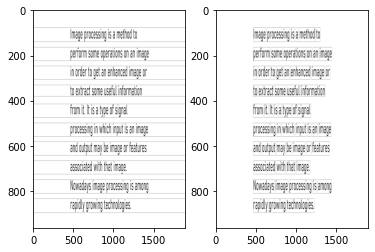

In [40]:
'''
Word level Segmentation : here we need to use  vertical histograms to find the space between the words in the line segmented 
                          image

'''
#code to find gap betwwen words
def find_gap(array,index):
  k = 0 
  while array[0][index+1+k]<2:
    k=k+1
    if index+1+k == u:
      k = 0
      break
  return k

lines = []
final_lines = []
for i in range(len(row_no)) :
  if i%2 == 0 : 
    vertical_hist =  Line_seg[row_no[i]+1:row_no[i+1]-1,:].shape[0] - np.sum(Line_seg[row_no[i]+1:row_no[i+1]-1,:],axis=0,keepdims=True)//255
    lines.append(vertical_hist)


for i in lines :
  ver_lines = []
  y =[]
  x = find_gap(i,0)
  ver_lines.append(99*x//100)

  for j in range (u-1):
    if i[0][j] >1 and  i[0][j+1]<2:
      x = find_gap(i,j)
      y.append(x)
  if max(y)>=2*(sum(y)//len(y)):
    xavg = (max(y)//1.7)
  else:
    xavg = max(y)+10
    

  
  for j in range (u-1):
    if i[0][j] >1 and  i[0][j+1]<2:    
      x = find_gap(i,j)
      if x>xavg:
        ver_lines.append(j+(3*x//10))
        ver_lines.append(j+(7*x//10))

  k=0
  while i[0][u-1-k] < 2 :
    k = k+1
  k = 99*k//100
  ver_lines.append(u-1-k)
  final_lines.append(ver_lines)
  


final_list = []
for i in range(len(row_no)):
  if i%2 == 0 :
    final_list.append([row_no[i],row_no[i+1],final_lines[i//2]])


array = cpy21
for i in final_list:
  x1 = i[0]
  x2 = i[1]
  y = i[2]
  for i in range(len(y)):
    if i%2 == 0 :
      array[x1,y[i]:y[i+1]] = 100
      array[x2,y[i]:y[i+1]] = 100
      array[x1:x2,y[i]] = 100
      array[x1:x2,y[i+1]] = 100
fig,a =  plt.subplots(1,2)
a[0].imshow(cpy3,cmap="gray",aspect='auto')
a[1].imshow(array,cmap="gray",aspect='auto')


# copies of array for further use
cpy4 = np.empty_like(array)
cpy4[:,:]=array[:,:]

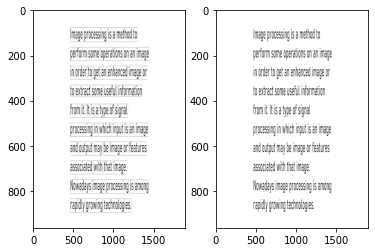

In [41]:
'''
Deslanting :
             In this method, 
    i) Taking the sum of black pixels in column wise to get a histogram of pixels along the width of the word.

   ii) Now the image is sheared at various matrices  and the variance  will be calculated  The angle at which the maximum 
       Variance is found, that corresponding angle will be the shear matrix for the image.
    
  iii) After finding the matrix, we can correct the slant by shearing the image that matrix.
'''

#function to to shear the image 
def find_variance2(arr, x ):
    m = np.array([[1,x,0],[0,1,0]]) 
    rows,col = arr.shape
    k = np.zeros((1000,1000))
    x = (1000-rows)//2
    y = (1000-col)//2
    k[x:x+rows,y:y+col] = arr[:,:]
    rows,col = k.shape
    data = cv2.warpAffine(k, m, (rows,col)) 
    row_histogram = np.sum(data, axis=0)
    variance = np.sum((row_histogram[1:] - row_histogram[:-1]) ** 2)
    return row_histogram, variance

for i in final_list:
  w =i[0]
  z =i[1]
  f =i[2]
  for p in range(len(f)):
    if p%2 == 0 :
  # for this method we nee to apply inversion 
      variances = []
      img = array[w+1:z-1,f[p]+1:f[p+1]-1]
      l = z-w-2
      k = f[p+1]-f[p]-2
      for i in range(l) :
        for j in range(k) :
          if img[i,j] == 255 :
            img[i,j] = 0
          else :
            img[i,j] = 255



      delta = 0.05
      angles = np.arange(-0.9,0.9, delta) #This process fails if we take the angles more than 60 we might end up getting a upside down img.
      variances = []
      angles
      for angle in angles:
          row_histogram, variance = find_variance2(img,angle)
          variances.append(variance)
      best_variance = max(variances)
      best_angle = angles[variances.index(best_variance)]
      rows,col = img.shape
      m = np.array([[1,best_angle,0],[0,1,0]]) 
      dst = cv2.warpAffine(img, m, (col,rows)) 

      for i in range(l) :
        for j in range(k) :
          if dst[i,j] == 255 :
            dst[i,j] = 0
          else :
            dst[i,j] = 255
      cpy11[w+1:z-1,f[p]+1:f[p+1]-1] = dst
      cpy14[w+1:z-1,f[p]+1:f[p+1]-1] = dst
fig,a =  plt.subplots(1,2)
a[0].imshow(cpy4,cmap="gray",aspect='auto')
a[1].imshow(cpy14,cmap="gray",aspect='auto')


# copies of array for further use
cpy5 = np.empty_like(array)
cpy5[:,:]=cpy11[:,:]
cpy9 = np.empty_like(cpy14)
cpy9[:,:]=cpy14[:,:]

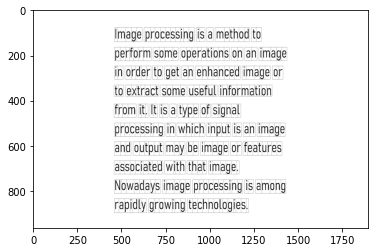

In [42]:
'''
Character level Segmentation : here we need to use  vertical histograms to find the minute space between the characters 
                               in the between words

'''
def find_gap(array,index):
  k = 0 
  while array[0][index+1+k]<1:
    k=k+1
    if index+1+k == u:
      k = 0
      break
  return k

def Remove(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list

lines = []
final_lines = []
for i in range(len(row_no)) :
  if i%2 == 0 : 
    vertical_hist =  cpy11[row_no[i]+1:row_no[i+1]-1,:].shape[0] - np.sum(Line_seg[row_no[i]+1:row_no[i+1]-1,:],axis=0,keepdims=True)//255
    lines.append(vertical_hist)


for i in lines :
  ver_lines = []
  y =[]
  

  for j in range (u-1):
    if i[0][j] >0 and  i[0][j+1]<1:
      x = find_gap(i,j)
      y.append(x)
  xavg = max(y)//2

  
  for j in range (u-1):
    if i[0][j] >0 and  i[0][j+1]<1:    
      x = find_gap(i,j)
      if  x>1:
        ver_lines.append(j+x-2)
        
  final_lines.append(ver_lines)
  


final_list2 = []
for i in range(len(row_no)):
  if i%2 == 0 :
    final_list2.append([row_no[i],row_no[i+1],final_lines[i//2]])


for i in range(len(final_list2)):
  d = final_list[i]
  f = d[2]
  e = final_list2[i]
  v = e[2]
  w = []
  for j  in range(len(f)):
    if j%2 == 0:
      w = []
      for l in range(len(v)):
        if v[l]>f[j]+7 and v[l]<f[j+1]:
          w.append(v[l])
      w.append(f[j])    
      w.append(f[j+1]) 
      w.sort()
      p = Remove(w)
      d.append(p)


array2 = cpy14
for i in final_list:
  x1 = i[0]
  x2 = i[1]
  z = i[2]
  for f in range(len(z)):
    if f%2 == 0 :
      array2[x1,z[f]:z[f+1]] = 100
      array2[x2,z[f]:z[f+1]] = 100


  for o in range(3,len(i)):
    y = i[o]
    for k in range(len(y)):
      array2[x1:x2,y[k]] = 100

plt.imshow(array2,cmap="gray",aspect='auto')

In [43]:
'''
Feature Extraction :  there are 3 feature techniques

                      i)  Statistical
                     ii)  Structural
                    iii)  Global transformations and moments
                    
     we extract different features like Zoning,Projections and profiles,Crossings and distances ,then make each feature as a 
     vector for particular letter, then use classifier to predict the inputs.Here we are going to use svm classifier which does 
     all the above for us.but as our processors are that fast and svm is too slow , we used a neural network model.
                  
'''
#files required for model
mapp = pd.read_csv('emnist-byclass-mapping.txt',delimiter=' ',names=['ASCII'])
mapp.head()
string_list = [chr(i) for i in mapp['ASCII'].values]
mapp['String'] = string_list
model = load_model('emnist_model_byclass.h5')


#resizing function
def get_square(image, square_size):

    height, width = image.shape    
    if(height > width):
        differ = height
    else:
        differ = width
    differ += 4

    # square filler
    mask = np.zeros((differ, differ), dtype = "uint8")

    x_pos = int((differ - width) / 2)
    y_pos = int((differ - height) / 2)

    # center image inside the square
    mask[y_pos: y_pos + height, x_pos: x_pos + width] = image[0: height, 0: width]

    # downscale if needed
    if differ / square_size > 1:
        mask = pyramid_reduce(mask, differ / square_size)
        if mask.shape != (28,28):
            mask = cv2.resize(mask, (square_size, square_size), interpolation = cv2.INTER_AREA)
    else:
        mask = cv2.resize(mask, (square_size, square_size), interpolation = cv2.INTER_AREA)
    return mask



def convert(s):
    new = ""
    for x in s:
        new += x 
    return new



for i in range(t) :
    for j in range(u) :
        if cpy5[i,j] == 0 :
            cpy5[i,j] = 255
        else :
            cpy5[i,j] = 0


final_Img = cpy5
sentance_list = []
for i in final_list:
    x1 = i[0]
    x2 = i[1]
    l = len(i)
    word_list = []
    for w in range(3,len(i)):
        z = i[w]
        char_list = []
        for f in range(len(z)-1):
            image = final_Img[x1:x2,z[f]:z[f+1]]
            image_2 = get_square(image,28)
            newer_image = image_2.reshape(1, 28, 28, 1)        
            pred = model.predict_classes(newer_image)
            f = mapp['String'][pred]
            k = f.tolist()
            q = k[0]
            char_list.append(q)
        word_list.append(convert(char_list))
    sentance_list.append(word_list)

def text(p):
    last = ""
    for i in p :
        new = ""
        for j in i :
            new = new + ' ' + j
        last =  last +'\n' + new
    return last
final_text = text(sentance_list)
final_text = final_text +'\n'
print(final_text) 



 lMage pr0CeSSing iS a Meth0d I0
 per10rM S0Me 0perati0nS 0n an iMage
 in 0rder t0 0et an ennanCed iMage 0r
 t0 extraCt S0Me USeFU1 jnF0rMatj0n
 1r0M it1 1t iS a Iype 0I Signa1
 pr0CeSSing in wniCn inpUt iS an iMage
 an0 0UtpUt May be iMage 0r 1eatUreS
 aSS0Ciated with Ihat iMage1
 N0wa0ayS iMage pr0CeSSing iS aM0ng
 rapidly gr0wing IeCnn0l0gieS1



In [44]:
'''
Postprocessing: here we will be doing spell correction using textblob and spell correction and finally create the document 
consisting the text.

'''
s = final_text
p = []
q = []

for k in s :
    p.append(k)
    if k == '\n':
        q.append(convert(p))
        p = []

j =[]
w = 0
for i in q:
    spell = sc()
    list1 = list(i.split())
    k=[]
    for word in list1:
        b = spell.correction(word)
        temp = b
        if(w==0):
            b = b[0].upper()+b[1:].lower()
        else:
            b = b[0].lower()+b[1:].lower()
        k.append(b)
        w = w+1
    j.append(k) 
    
final_text2 = text(j)
para1 = TextBlob(final_text2)           
para2 = str(para1.correct())       
mydoc = docx.Document()
mydoc.add_paragraph(para2)
mydoc.save("C:/Users/kamar/OneDrive/Desktop/IP/processed.docx")
doc = docx.Document("C:/Users/kamar/OneDrive/Desktop/IP/processed.docx")
all_paras = doc.paragraphs
for para in all_paras:
    print(para.text)



 Image processing is a method i
 perform some operations in an image
 in order to get an enhanced image or
 to extract some useful jnf0rmatj0n
 from it it is a type i signal
 processing in which input is an image
 and output may be image or features
 associated with that image
 nowadays image processing is among
 rapidly growing iecnn0l0gies1


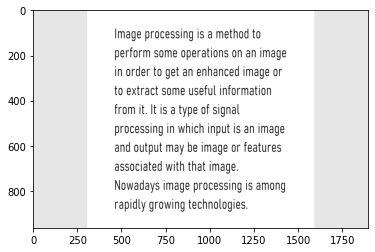

In [45]:
plt.imshow(copy_1,cmap="gray",aspect='auto')

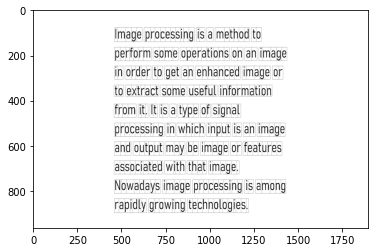

In [46]:
plt.imshow(array2,cmap="gray",aspect='auto')

In [47]:
print(para2)



 Image processing is a method i
 perform some operations in an image
 in order to get an enhanced image or
 to extract some useful jnf0rmatj0n
 from it it is a type i signal
 processing in which input is an image
 and output may be image or features
 associated with that image
 nowadays image processing is among
 rapidly growing iecnn0l0gies1
